In [15]:
#特征选择 feature_selection

In [16]:
#导入数据，让我们使用digit recognizor数据来一展身手

In [17]:
import pandas as pd
# data = pd.read_csv(r"E:\代码\机器学习\sklearn学习_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\03数据预处理和特征工程\digit recognizor.csv")
data = pd.read_csv(r"H:\学习小分队\机器学习\数据集\digit recognizor.csv")

X = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [18]:
X.shape

"""
这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
用这个数据举例，能更够体现特征工程的重要性。
"""

'\n这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。\n用这个数据举例，能更够体现特征工程的重要性。\n'

In [19]:
######################## 3.1Filter过滤法 ########################

In [20]:
######3.1.1方差过滤 VarianceThreshold 优先消除方差为0的特征

'''VarianceThreshold有重要参数threshold，表示方
差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。'''

'VarianceThreshold有重要参数threshold，表示方\n差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。'

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
selector = VarianceThreshold() #实例化，不填参数默认方差为0

In [23]:
X_var0 = selector.fit_transform(X) #获取删除不合格特征之后的新特征矩阵
# 也可以直接写成 X=VairanceThreshold.fit_transform(X)

In [24]:
X_var0.shape

(42000, 708)

In [25]:
'''可以看见，我们已经删除了方差为0的特征，但是依然剩下了708多个特征，明显还需要进一步的特征选择。然
而，如果我们知道我们需要多少个特征，方差也可以帮助我们将特征选择一步到位。比如说，我们希望留下一半的
特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，再将这个中位数作为参数
threshold的值输入就好了：'''

'可以看见，我们已经删除了方差为0的特征，但是依然剩下了708多个特征，明显还需要进一步的特征选择。然\n而，如果我们知道我们需要多少个特征，方差也可以帮助我们将特征选择一步到位。比如说，我们希望留下一半的\n特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，再将这个中位数作为参数\nthreshold的值输入就好了：'

In [26]:
import numpy as np

In [27]:
type(X.var()) #每一列的方差
X.var().values #将每一列的方差放入一个排列中

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [28]:
np.median(X.var().values)

1352.286703180131

In [29]:
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [30]:
X_fsvar.shape

(42000, 392)

In [31]:
'''当特征是二分类时，特征的取值就是伯努利随机变量，这些变量的方差可以计算为：
其中X是特征矩阵，p是二分类特征中的一类在这个特征中所占的概率。'''

'当特征是二分类时，特征的取值就是伯努利随机变量，这些变量的方差可以计算为：\n其中X是特征矩阵，p是二分类特征中的一类在这个特征中所占的概率。'

In [32]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)

In [33]:
X_bvar.shape

(42000, 685)

In [34]:
######3.1.1方差过滤 VarianceThreshold 优先消除方差为0的特征

In [35]:
######3.1.2相关性过滤 

In [36]:
#3.1.2.1 卡方过滤
'''卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤借此除去最可能独立于标签，与我们分类目
的无关的特征'''

'卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤借此除去最可能独立于标签，与我们分类目\n的无关的特征'

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest #输入”评分标准“来选出前K个分数最高的特征的类 
from sklearn.feature_selection import chi2 #计算每个非负特征和标签之间的卡方统计量，并依照卡方统计量 k 由高到低为特征排名

In [39]:
#假设在我们这里我知道我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)

In [40]:
X_fschi.shape

(42000, 300)

In [41]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

In [42]:
#只进行了方差过滤，没有进行相关性过滤
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9390476190476191

In [43]:
#3.1.2.1 卡方过滤

In [44]:
#3.1.2.2 选取超参数K 学习曲线

In [45]:
#======【TIME WARNING: 5 mins】======#

# %matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
print(score)

[0.9397380952380953, 0.9383809523809523, 0.9386428571428571, 0.9372142857142857, 0.9386428571428571, 0.9380714285714287, 0.9384047619047617, 0.9343809523809524, 0.9351428571428573, 0.9344761904761905, 0.933642857142857, 0.9325714285714286, 0.9305, 0.9288095238095238, 0.9287142857142857, 0.9245238095238095, 0.9235714285714286, 0.9207142857142857, 0.9193571428571428]


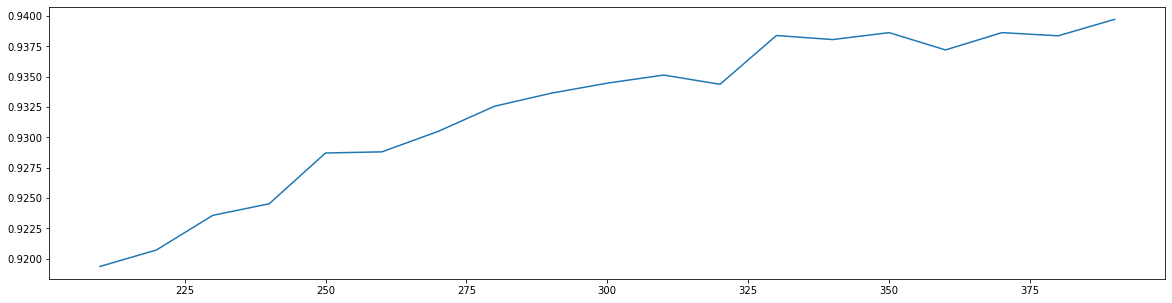

In [46]:
plt.figure(figsize=[20,5]) #画布的比列
plt.plot(range(390,200,-10),score)
plt.show()

In [47]:
type(score)

list

In [48]:
#介绍一种更好的选择k的方法：看p值选择k。
'''卡方检验返回卡方值和
P值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断
的边界.
从特征工程的角度，我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。而调用
SelectKBest之前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值。'''

'卡方检验返回卡方值和\nP值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断\n的边界.\n从特征工程的角度，我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。而调用\nSelectKBest之前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值。'

In [49]:
chivalue, pvalues_chi = chi2(X_fsvar,y) #卡方检验返回卡方值和P值两个统计量

In [50]:
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [51]:
pvalues_chi #p <0.05

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
chivalue.shape[0]

392

In [53]:
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [54]:
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

In [55]:
#3.1.2.2 选取超参数K 学习曲线

In [56]:
#3.1.2.3 F检验
#F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。

In [57]:
'''。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回
归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。'''

'。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回\n归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。'

In [58]:
from sklearn.feature_selection import f_classif

In [59]:
F, pvalues_f = f_classif(X_fsvar, y) #f检验返回f值和p值

In [60]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [61]:
pvalues_f #p <0.05

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [62]:
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = F.shape[0] - (pvalues_f > 0.05).sum()

In [63]:
k

392

In [64]:
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0), X_fsF, y, cv=5).mean()

In [65]:
#3.1.2.3 F检验

In [66]:
#3.1.2.4 互信息法
#互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法。

In [67]:
'''和F检验相似，它既
可以做回归也可以做分类，并且包含两个类feature_selection.mutual_info_classif（互信息分类）和
feature_selection.mutual_info_regression（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过
互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。
互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间
取值，为0则表示两个变量独立，为1则表示两个变量完全相关。'''

'和F检验相似，它既\n可以做回归也可以做分类，并且包含两个类feature_selection.mutual_info_classif（互信息分类）和\nfeature_selection.mutual_info_regression（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过\n互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。\n互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间\n取值，为0则表示两个变量独立，为1则表示两个变量完全相关。'

In [68]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [69]:
result = MIC(X_fsvar,y)  #每个特征与目标之间的互信息量的估计

In [70]:
result

array([0.06371452, 0.07658354, 0.10252429, 0.11200571, 0.11177548,
       0.105156  , 0.08521433, 0.05792457, 0.07105671, 0.1028682 ,
       0.11506982, 0.13817535, 0.16131598, 0.16891027, 0.15455364,
       0.12855198, 0.09121823, 0.06830356, 0.03751349, 0.0247796 ,
       0.07321563, 0.09831288, 0.11959454, 0.14832692, 0.17667793,
       0.20413291, 0.2225894 , 0.23719841, 0.2125149 , 0.18120386,
       0.14037409, 0.10025194, 0.07542685, 0.06336639, 0.0435176 ,
       0.04086442, 0.05690598, 0.08583728, 0.10025897, 0.12088067,
       0.14268201, 0.14728065, 0.16559187, 0.18091189, 0.18192559,
       0.17043837, 0.1533248 , 0.13215602, 0.1082753 , 0.09381765,
       0.07908478, 0.0689382 , 0.06611955, 0.04571801, 0.05602287,
       0.07089786, 0.08614778, 0.0974865 , 0.10903839, 0.10751623,
       0.11344716, 0.10974155, 0.11414486, 0.11485762, 0.10883744,
       0.11801663, 0.11524313, 0.11093603, 0.09354116, 0.07960163,
       0.0700957 , 0.03546047, 0.05579871, 0.06355306, 0.07177

In [71]:
k = result.shape[0] - sum(result <= 0)

In [72]:
k

392

In [73]:
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

In [74]:
#3.1.2.4 互信息法

In [75]:
######################## 3.1Filter过滤法 ########################

In [76]:
######################## 3.2 Embedded嵌入法 ########################

In [77]:
#嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。

In [78]:
'''在使用嵌入法时，我们先使
用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。
无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为
缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版'''

'在使用嵌入法时，我们先使\n用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。\n无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为\n缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版'

In [79]:
#class sklearn.feature_selection.SelectFromModel (estimator, threshold=None, prefit=False, norm_order=1,max_features=None)

In [80]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [81]:
RFC_ = RFC(n_estimators =10,random_state=0)

In [82]:
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征只能够分到大约0.001的feature_importances_
#把小余 threshold 的删掉

In [83]:
X_embedded.shape

(42000, 47)

In [84]:
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [101]:
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [88]:
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
#从0 到最大值之间取出20个数

In [89]:
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

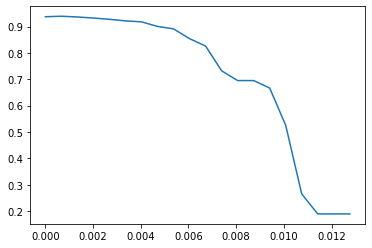

In [90]:
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [93]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)
X_embedded.shape

(42000, 324)

In [94]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9391190476190475

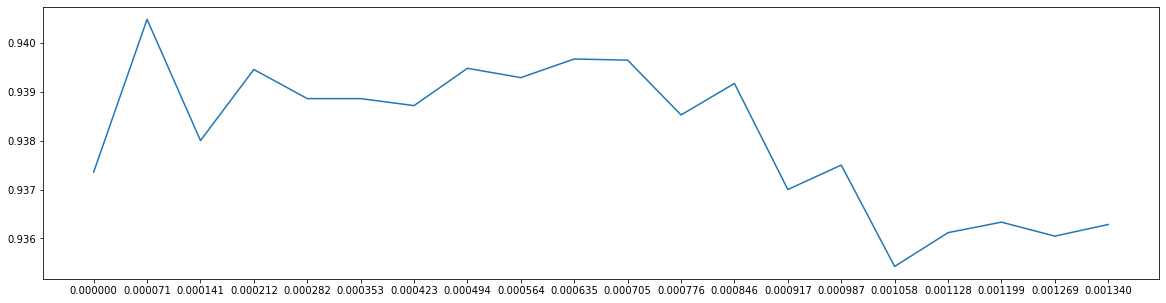

In [95]:
#和其他调参一样，我们可以在第一条学习曲线后选定一个范围，使用细化的学习曲线来找到最佳值：
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [99]:
X_embedded_ = SelectFromModel(RFC_,threshold=0.000071).fit_transform(X,y)
X_embedded_.shape

(42000, 461)

In [100]:
cross_val_score(RFC_,X_embedded_,y,cv=5).mean()

0.9388809523809524

In [98]:
#=====【TIME WARNING：2 min】=====#
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.964642857142857

In [ ]:
######################## 3.2 Embedded嵌入法 ########################

In [ ]:
######################## 3.3 Wrapper包装法 ########################

In [ ]:
'''包装法也是一个特征选择和算法训练同时进行的方法，与嵌入法十分相似，它也是依赖于算法自身的选择，比如
coef_属性或feature_importances_属性来完成特征选择。'''

In [ ]:
'''使用一个目标函数作为黑盒来帮
助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。
包装法在初始特征集上训练评估器，并且通过
coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的
特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。'''

In [ ]:
#最典型的目标函数是递归特征消除法（Recursive feature elimination, 简写为RFE）。
#class sklearn.feature_selection.RFE (estimator, n_features_to_select=None, step=1, verbose=0)
#参数estimator是需要填写的实例化后的评估器，n_features_to_select是想要选择的特征个数，step表示每次迭代中希望移除的特征个数。

#.support_：返回所有的特征的是否最后被选中的布尔矩阵
#.ranking_返回特征的按数次迭代中综合重要性的排名。
'''反复创建模型，并在每次迭代时保留最佳特征或剔除最差特征，下一次迭代时，
它会使用上一次建模中没有被选中的特征来构建下一个模型，直到所有特征都耗尽为止。 然后，它根据自己保留或
剔除特征的顺序来对特征进行排名，最终选出一个最佳子集。'''

In [106]:
from sklearn.feature_selection import RFE

In [107]:
RFC_ = RFC(n_estimators = 10, random_state = 0)

In [113]:
selector = RFE(RFC_, n_features_to_select= 340, step = 50).fit(X,y)

In [115]:
selector.support_.sum()

340

In [117]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [121]:
X_wrapper = selector.transform(X)

In [124]:
cross_val_score(RFC_, X_wrapper, y, cv=5).mean()

0.9379761904761905

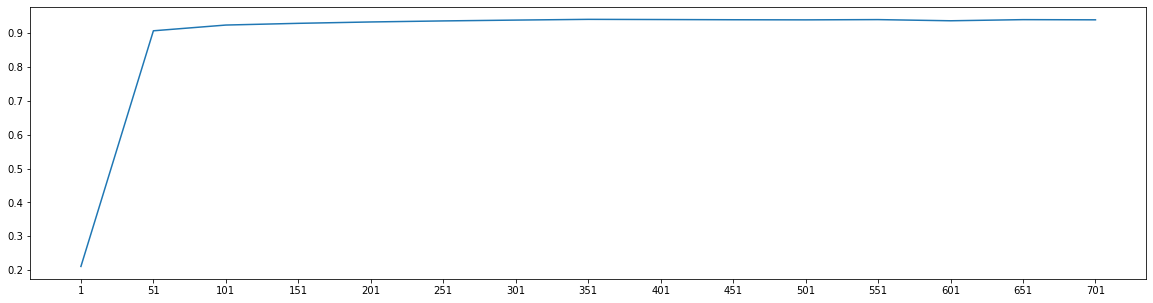

In [125]:
#n_features_to_select 对选择多少个特征进行学习曲线

#======【TIME WARNING: 15 mins】======#
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

In [ ]:
'''，过滤法更快速，但更粗糙。包装法和嵌入法更精确，比较适合具体到算
法去调整，但计算量比较大，运行时间长。当数据量很大的时候，优先使用方差过滤和互信息法调整，再上其他特
征选择方法。使用逻辑回归时，优先使用嵌入法。使用支持向量机时，优先使用包装法。迷茫的时候，从过滤法走
起，看具体数据具体分析。'''